<center>
<h1 style="font-size: 36px;">NBA Play by Play Analysis</h1>
</center>

[GitHub Repo](https://github.com/BrianMillerS/TOOL1_FINAL_PROJECT)  
Data Science Tools 1 Final Project  
Group Members: Brian Hanson, Brian Miller  
March 9th, 2023

## Dataset and Motivation:  
"How/why the dataset was collected and a description of the metadata of your dataset."

## Research Question:  

"What real-world problem are you trying to solve? What are the input and output of your 
analysis?"

## Literature Review:  

"What other work has been done in this area, and how is your work novel compared to 
others?"  

## Quality of Cleaning:  
- Data cleaning and type conversion activity.  Please share anything unusual you faced 
during this activity.  
 
- What did you do about missing values and why? Handling missing values properly is 
very important.  
 
- New feature/attribute creation and data summary statistics and interpretation.   

## Vizualization  
- Data visualization activity (box plot, bar plot, violin plot, and pairplot to see relationships 
and distribution, etc.). 
 
- Describe anything you find in the data after each visualization. 
 
- What data visualization helped you understand about data distribution. 
 
- What you did about possible outlier as per data distribution visualization. (Did you confirm 
with your client whether it is actually an outlier or put a disclosure statement in your notebook if 
you decided to remove it?) 

In [6]:
## Dependencies ##

# load custom functions from our support py files
from play_by_play import load_specific_games, get_lineup_feature, load_seasons, get_lineup_results

# load general dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# single game data
df = load_specific_games(16)

game_features = get_lineup_feature(df, table_name='info',
                       col_name='Height_cm',
                       seasons_ago=1,
                       agg='list',
                       delta_AwayHome=False)

# col_name ['Height_cm', 'Mass_kg', 'age', 'salary']
# agg ['list', 'mean', 'median', 'min', 'max', 'range', 'std']

print(game_features.columns.to_list())

Lineup Miscount Games:  {}
/boxscores/201510270ATL.html, Loading korveky01...  already exists locally
Loading sefolth01...  already exists locally
Loading teaguje01...  already exists locally
Loading meeksjo01...  already exists locally
Loading baynear01...  already exists locally
Loading bazemke01...  already exists locally
Loading muscami01...  already exists locally
Loading ilyaser01...  already exists locally
Loading splitti01...  already exists locally
Loading horfoal01...  already exists locally
Loading blakest01...  already exists locally
Loading jacksre01...  already exists locally
Loading caldwke01...  already exists locally
Loading pattela01...  already exists locally
Loading drumman01...  already exists locally
Loading morrima03...  already exists locally
Loading millspa01...  already exists locally
Loading scottmi01...  already exists locally
Loading schrode01...  already exists locally
Loading johnsst04...  already exists locally
['URL', 'GameType', 'Location', 'Date', 'Se

In [3]:
# load multiple seaons of default data
df_2016 = load_seasons(seasons=[16], lineups=True, possessions=True, drop_lineup_miscount_games=True)
df_2016_lineups = get_lineup_results(df_2016, return_lineup_matchups=True)


/boxscores/201510270ATL.html, /boxscores/201510270CHI.html, Loading brookaa01...  already exists locally
Loading mirotni01...  already exists locally
Loading dellama01...  already exists locally
Loading willima01...  already exists locally
Loading smithjr01...  already exists locally
Loading gasolpa01...  already exists locally
Loading butleji01...  already exists locally
Loading mozgoti01...  already exists locally
Loading gibsota01...  already exists locally
Loading mcderdo01...  already exists locally
Loading mooreet01...  already exists locally
Loading jamesle01...  already exists locally
Loading jonesja02...  already exists locally
Loading thomptr01...  already exists locally
Loading loveke01...  already exists locally
Loading jefferi01...  already exists locally
Loading noahjo01...  already exists locally
Loading cunnija01...  already exists locally
Loading rosede01...  already exists locally
Loading varejan01...  already exists locally
Loading snellto01...  already exists locall

In [24]:
# drop lineups that had no play time, or no possessions
df_2016_lineups = df_2016_lineups[df_2016_lineups['SecElapsed'] != 0]
df_2016_lineups = df_2016_lineups[df_2016_lineups['TotalPossessions'] != 0]

# calculate the point differential (home-away)
df_2016_lineups['Pts_diff'] = df_2016_lineups['HomePts']-df_2016_lineups['AwayPts']
df_2016_lineups['Pts_diff_perPos'] = df_2016_lineups['Pts_diff']/df_2016_lineups['TotalPossessions']
df_2016_lineups['Pts_diff_perSec'] = df_2016_lineups['Pts_diff']/df_2016_lineups['SecElapsed']

# check for missing values
print(df_2016_lineups.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35082 entries, 0 to 35380
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            35082 non-null  object 
 1   AwayLineup        35082 non-null  object 
 2   HomeLineup        35082 non-null  object 
 3   SecElapsed        35082 non-null  float64
 4   AwayPossEnd       35082 non-null  int64  
 5   HomePossEnd       35082 non-null  int64  
 6   AwayPts           35082 non-null  int64  
 7   HomePts           35082 non-null  int64  
 8   HomePPP           33805 non-null  float64
 9   AwayPPP           33919 non-null  float64
 10  TotalPossessions  35082 non-null  int64  
 11  SecElapsedCumsum  35082 non-null  float64
 12  TotPossCumsum     35082 non-null  float64
 13  Pts_diff          35082 non-null  int64  
 14  Pts_diff_perPos   35082 non-null  float64
 15  Pts_diff_perSec   35082 non-null  float64
dtypes: float64(7), int64(6), object(3)
memor

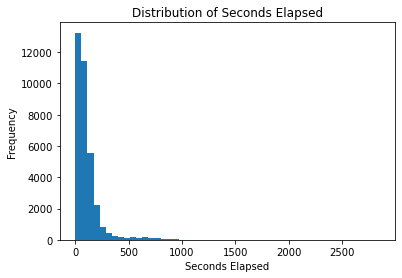

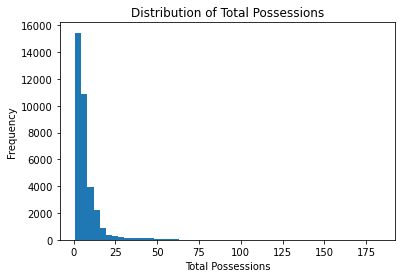

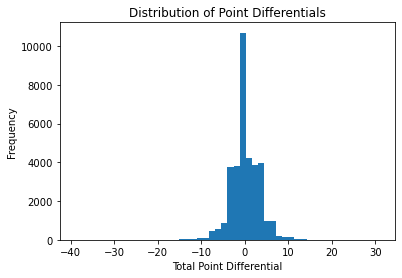

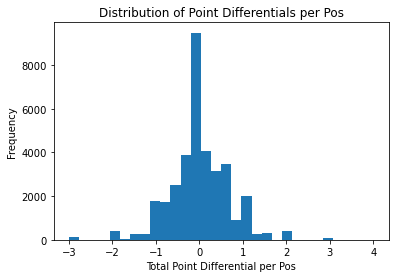

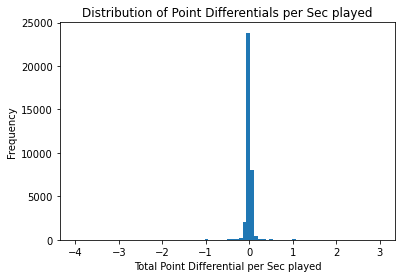

In [29]:
## Vizualize Basic Distributions ##

# create a histogram of SecElapsed
plt.hist(df_2016_lineups['SecElapsed'], bins=50)
plt.xlabel("Seconds Elapsed")
plt.ylabel("Frequency")
plt.title("Distribution of Seconds Elapsed")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['TotalPossessions'], bins=50)
plt.xlabel("Total Possessions")
plt.ylabel("Frequency")
plt.title("Distribution of Total Possessions")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['Pts_diff'], bins=50)
plt.xlabel("Total Point Differential")
plt.ylabel("Frequency")
plt.title("Distribution of Point Differentials")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['Pts_diff_perPos'], bins=30)
plt.xlabel("Total Point Differential per Pos")
plt.ylabel("Frequency")
plt.title("Distribution of Point Differentials per Pos")
plt.show()

# create a histogram of TotPossessions
plt.hist(df_2016_lineups['Pts_diff_perSec'], bins=80)
plt.xlabel("Total Point Differential per Sec played")
plt.ylabel("Frequency")
plt.title("Distribution of Point Differentials per Sec played")
plt.show()

In [31]:
# isolate the top performing 10% of matchups
quantile_95 = df_2016_lineups['Pts_diff_perPos'].quantile(0.5)

# select the rows with Pts_diff_perPos above the 90th percentile
top_10_percent_pos = df_2016_lineups[df_2016_lineups['Pts_diff_perPos'] >= quantile_90]

# find the 10th percentile of Pts_diff_perPos
quantile_05 = df_2016_lineups['Pts_diff_perPos'].quantile(0.05)

# select the rows with Pts_diff_perPos below the 10th percentile and with negative values
top_10_percent_neg = df_2016_lineups[(df_2016_lineups['Pts_diff_perPos'] <= quantile_10) & (df_2016_lineups['Pts_diff_perPos'] < 0)]



In [32]:
df_2016_features = get_lineup_feature(df_2016_lineups, table_name='info',
                       col_name='Height_cm',
                       seasons_ago=1,
                       agg='list',
                       delta_AwayHome=False)

In [ ]:
sns.violinplot()